In [25]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
directors_df = pd.read_csv('../data/train/directors.tsv', sep='\t') # 감독 정보
genres_df = pd.read_csv('../data/train/genres.tsv', sep='\t') # 장르 정보
titles_df = pd.read_csv('../data/train/titles.tsv', sep='\t') # 영화 제목 정보
writers_df = pd.read_csv('../data/train/writers.tsv', sep='\t') # 각본가 정보
years_df = pd.read_csv('../data/train/years.tsv', sep='\t') # 개봉 연도 정보

train_df = pd.read_csv('../data/train/train_ratings.csv') # 전체 학습 데이터

In [27]:
# 모든 데이터 병합
movies_df = genres_df.merge(directors_df, on='item', how='left') \
                     .merge(titles_df, on='item', how='left') \
                     .merge(writers_df, on='item', how='left') \
                     .merge(years_df, on='item', how='left')


In [28]:
# 병합된 데이터 확인
print(movies_df.head())
print(movies_df.info())

# 결측치 확인
print(movies_df.isnull().sum())

# 중복 행 확인
print(movies_df[movies_df.duplicated()])

   item   genre   director                             title     writer  \
0   318   Crime  nm0001104  Shawshank Redemption, The (1994)  nm0000175   
1   318   Crime  nm0001104  Shawshank Redemption, The (1994)  nm0001104   
2   318   Drama  nm0001104  Shawshank Redemption, The (1994)  nm0000175   
3   318   Drama  nm0001104  Shawshank Redemption, The (1994)  nm0001104   
4  2571  Action  nm0905152                Matrix, The (1999)  nm0905152   

     year  
0  1994.0  
1  1994.0  
2  1994.0  
3  1994.0  
4  1999.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37674 entries, 0 to 37673
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      37674 non-null  int64  
 1   genre     37674 non-null  object 
 2   director  33345 non-null  object 
 3   title     37674 non-null  object 
 4   writer    35307 non-null  object 
 5   year      37634 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7

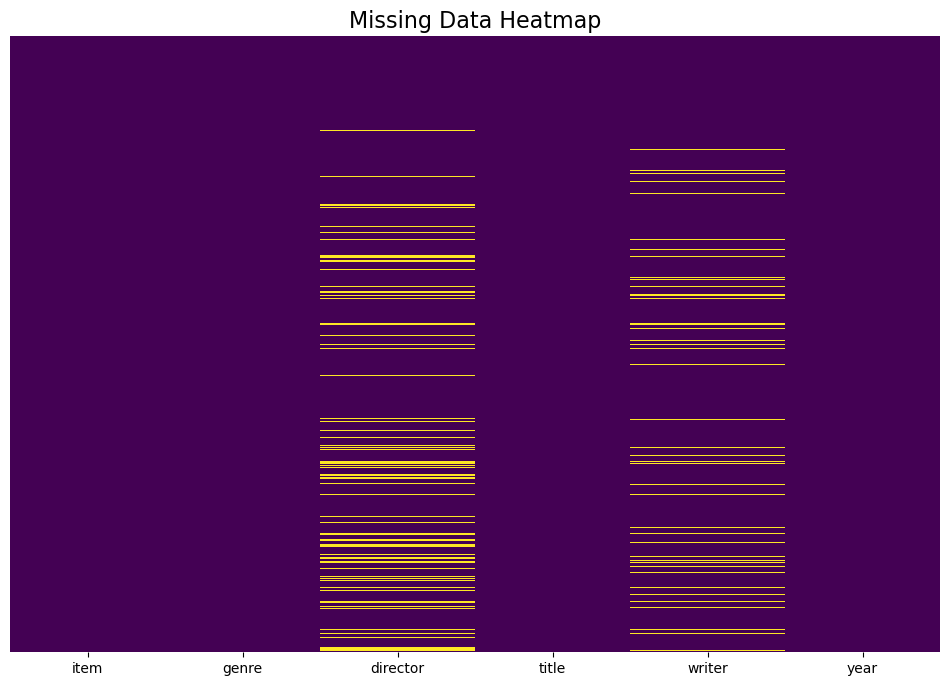

In [29]:
# 히트맵을 위한 결측치 정보
missing_data = movies_df.isnull()

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap', fontsize=16)
plt.show()

director, writer, year 에서 결측치가 존재한다.

In [30]:
# year가 null인 행 필터링
year_null = movies_df[movies_df['year'].isnull()]

# 결과 출력
year_null


,item,genre,director,title,writer,year
9583,6987,Crime,NaN,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",nm0562346,NaN
9584,6987,Fantasy,NaN,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",nm0562346,NaN
9585,6987,Horror,NaN,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",nm0562346,NaN
10944,3310,Comedy,nm0000122,"Kid, The (1921)",nm0000122,NaN
10945,3310,Drama,nm0000122,"Kid, The (1921)",nm0000122,NaN
15109,7065,Drama,nm0000428,"Birth of a Nation, The (1915)",nm0000428,NaN
15110,7065,Drama,nm0000428,"Birth of a Nation, The (1915)",nm0940488,NaN
15111,7065,War,nm0000428,"Birth of a Nation, The (1915)",nm0000428,NaN
15112,7065,War,nm0000428,"Birth of a Nation, The (1915)",nm0940488,NaN
16055,7243,Drama,nm0000428,Intolerance: Love's Struggle Throughout the Ag...,nm0000428,NaN


In [31]:
import re

# title에서 연도를 추출하는 함수
def extract_year_from_title(title):
    match = re.search(r'\((\d{4})\)', title)  # 괄호 안에 4자리 숫자
    return int(match.group(1)) if match else None

# year가 null인 행 필터링
year_null = movies_df[movies_df['year'].isnull()]

# title에서 연도를 추출하여 year에 넣기
movies_df.loc[movies_df['year'].isnull(), 'year'] = year_null['title'].apply(extract_year_from_title)

# 결과 확인
print("Updated movies_df with missing years filled:")
print(movies_df[movies_df['item'].isin(year_null['item'])][['item', 'title', 'year']])


Updated movies_df with missing years filled:
         item                                              title    year
9583     6987  Cabinet of Dr. Caligari, The (Cabinet des Dr. ...  1920.0
9584     6987  Cabinet of Dr. Caligari, The (Cabinet des Dr. ...  1920.0
9585     6987  Cabinet of Dr. Caligari, The (Cabinet des Dr. ...  1920.0
10944    3310                                    Kid, The (1921)  1921.0
10945    3310                                    Kid, The (1921)  1921.0
15109    7065                      Birth of a Nation, The (1915)  1915.0
15110    7065                      Birth of a Nation, The (1915)  1915.0
15111    7065                      Birth of a Nation, The (1915)  1915.0
15112    7065                      Birth of a Nation, The (1915)  1915.0
16055    7243  Intolerance: Love's Struggle Throughout the Ag...  1916.0
16056    7243  Intolerance: Love's Struggle Throughout the Ag...  1916.0
16057    7243  Intolerance: Love's Struggle Throughout the Ag...  1916.0
16058 

In [32]:
# year가 null인 행 다시 확인
year_null = movies_df[movies_df['year'].isnull()]

# 결과 출력
year_null


,item,genre,director,title,writer,year


In [33]:
import re

# title에서 연도를 추출하는 함수
def extract_year_from_title(title):
    match = re.search(r'\((\d{4})\)', title)  # 괄호 안에 4자리 숫자
    return int(match.group(1)) if match else None

# title에서 연도 추출
movies_df['extracted_year'] = movies_df['title'].apply(extract_year_from_title)

# 연도 비교
mismatch_years = movies_df[movies_df['extracted_year'] != movies_df['year']]

# 결과 출력
print("Title과 Year의 연도가 다른 경우:")
print(mismatch_years[['item', 'title', 'year', 'extracted_year']])


Title과 Year의 연도가 다른 경우:
         item                         title    year  extracted_year
31686  108583     Fawlty Towers (1975-1979)  1975.0             NaN
35607  108548  Big Bang Theory, The (2007-)  2007.0             NaN


시리즈물은 첫 방영 기준으로 연도가 적힌 것으로 추정

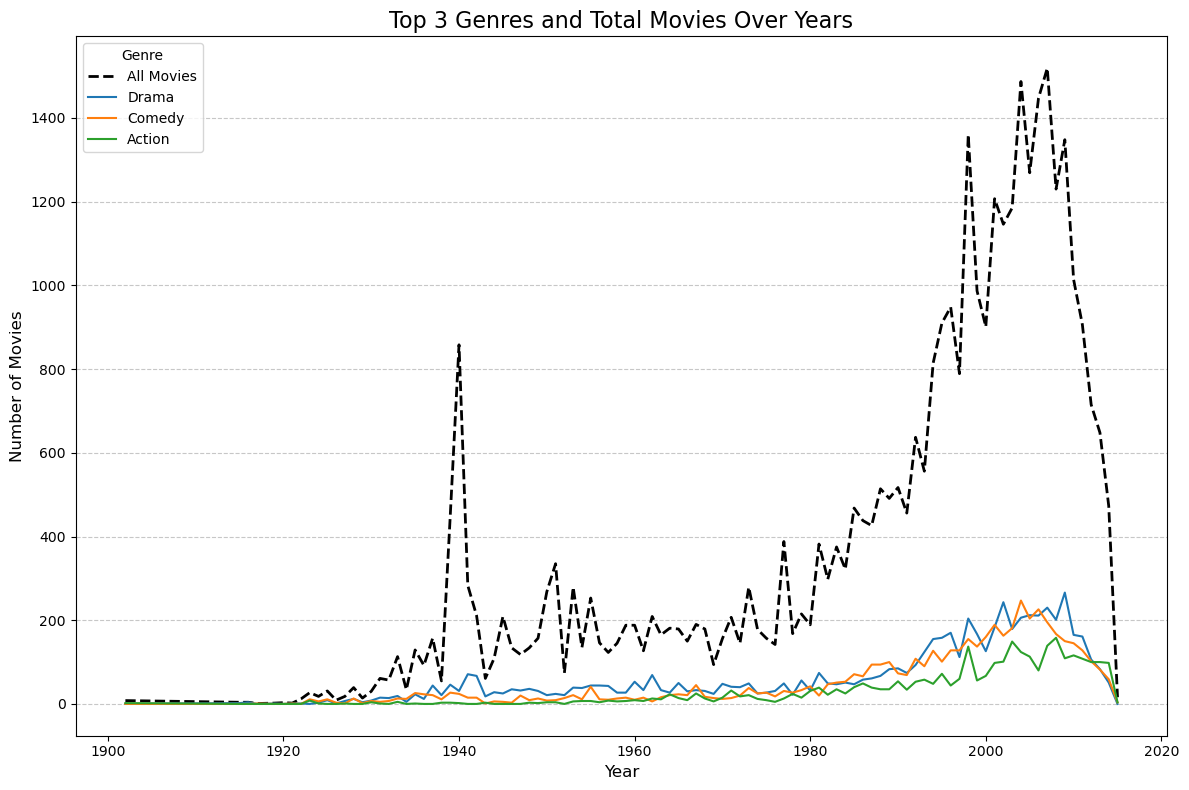

In [34]:
import matplotlib.pyplot as plt

# 데이터 준비
year_genre = movies_df.groupby(['year', 'genre']).size().unstack(fill_value=0)

# 전체 영화 데이터 계산 (연도별 총합)
all_movies = year_genre.sum(axis=1)

# 장르별 총 영화 수 계산 및 상위 3개 선택
top_genres = year_genre.sum().sort_values(ascending=False).head(3).index

# 상위 3개 장르 데이터 필터링
top_genre_data = year_genre[top_genres]

# 시각화
plt.figure(figsize=(12, 8))

# 전체 영화 추가
plt.plot(all_movies.index, all_movies, label='All Movies', color='black', linestyle='--', linewidth=2)

# 상위 3개 장르 추가
for genre in top_genre_data.columns:
    plt.plot(top_genre_data.index, top_genre_data[genre], label=genre)

# 그래프 설정
plt.title('Top 3 Genres and Total Movies Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.legend(title='Genre', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 표시
plt.show()


In [35]:
# 사용자별 영화 시청 이력 정렬
train_df_sorted = train_df.sort_values(by=['user', 'time'])
print(train_df_sorted.head(10))


   user  item        time
0    11  4643  1230782529
1    11   170  1230782534
2    11   531  1230782539
3    11   616  1230782542
4    11  2140  1230782563
5    11  2722  1230782583
6    11  2313  1230782646
7    11  2688  1230782656
8    11  2428  1230782694
9    11  3113  1230782719
